# ▶ Part1. 지지도/신뢰도향상도 계산

In [114]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [1]:
##############################
##  데이터셋 임의 제작
################################

dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]
import numpy as np
np.shape(dataset)

C:\Users\hmh\miniconda3\envs\hmh\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(4,)

In [3]:
dataset

[['사과', '치즈', '생수'],
 ['생수', '호두', '치즈', '고등어'],
 ['수박', '사과', '생수'],
 ['생수', '호두', '치즈', '옥수수']]

In [25]:
##############################
##  리스트자료 -> 연관분석 셋으로 변환
################################

# [방법1]
te=TransactionEncoder()
te.fit(dataset)
print(te.columns_)
te_arry=te.transform(dataset)
print(te_arry)


['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']
[[False  True  True False False  True False]
 [ True False  True False False  True  True]
 [False  True  True  True False False False]
 [False False  True False  True  True  True]]


In [30]:
#[방법2]
te=TransactionEncoder()
te_arry=te.fit(dataset).transform(dataset)
print(te_arry)
print(te.columns_)

[[False  True  True False False  True False]
 [ True False  True False False  True  True]
 [False  True  True  True False False False]
 [False False  True False  True  True  True]]
['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']


In [32]:
#데이터프레임으로 변환
df=pd.DataFrame(te_arry, columns=te.columns_)
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [38]:
#단일 변수 지지도 계산
frequency_itemsets=apriori(df, use_colnames=True)
frequency_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(사과, 생수)"
5,0.75,"(생수, 치즈)"
6,0.50,"(호두, 생수)"
7,0.50,"(호두, 치즈)"
8,0.50,"(호두, 생수, 치즈)"


In [43]:
# 지지도 하한선 정하기 (지지도가 1% 이상이 항목들 표시)
frequency_itemsets=apriori(df,min_support=0.01,use_colnames=True)
frequency_itemsets

,support,itemsets
0,0.25,(고등어)
1,0.50,(사과)
2,1.00,(생수)
3,0.25,(수박)
4,0.25,(옥수수)
5,0.75,(치즈)
6,0.50,(호두)
7,0.25,"(생수, 고등어)"
8,0.25,"(치즈, 고등어)"
9,0.25,"(호두, 고등어)"


In [56]:
#지지도 상위 : 지지도 가장 높은 항목 5개
top5=frequency_itemsets.sort_values('support',ascending=False).head(5)
top5

,support,itemsets,length
2,1.00,(생수),1
15,0.75,"(생수, 치즈)",2
5,0.75,(치즈),1
16,0.50,"(호두, 생수)",2
1,0.50,(사과),1


In [64]:
## item 조합 갯수가 특정 갯수 이상의 item만 추출
display(frequency_itemsets[:8])
frequency_itemsets['length']=frequency_itemsets['itemsets'].apply(lambda x: len(x))
display(frequency_itemsets)
frequency_itemsets[frequency_itemsets['length']<=2]

,support,itemsets,length
0,0.25,(고등어),1
1,0.50,(사과),1
2,1.00,(생수),1
3,0.25,(수박),1
4,0.25,(옥수수),1
5,0.75,(치즈),1
6,0.50,(호두),1
7,0.25,"(생수, 고등어)",2


,support,itemsets,length
0,0.25,(고등어),1
1,0.50,(사과),1
2,1.00,(생수),1
3,0.25,(수박),1
4,0.25,(옥수수),1
5,0.75,(치즈),1
6,0.50,(호두),1
7,0.25,"(생수, 고등어)",2
8,0.25,"(치즈, 고등어)",2
9,0.25,"(호두, 고등어)",2


,support,itemsets,length
0,0.25,(고등어),1
1,0.50,(사과),1
2,1.00,(생수),1
3,0.25,(수박),1
4,0.25,(옥수수),1
5,0.75,(치즈),1
6,0.50,(호두),1
7,0.25,"(생수, 고등어)",2
8,0.25,"(치즈, 고등어)",2
9,0.25,"(호두, 고등어)",2


In [70]:
#특정 아이템즈(치즈)이 포함된 것만 추출
frequency_itemsets[frequency_itemsets['itemsets'].apply(lambda x: '치즈' in x)]

,support,itemsets,length
5,0.75,(치즈),1
8,0.25,"(치즈, 고등어)",2
12,0.25,"(사과, 치즈)",2
15,0.75,"(생수, 치즈)",2
17,0.25,"(치즈, 옥수수)",2
19,0.50,"(호두, 치즈)",2
20,0.25,"(생수, 치즈, 고등어)",3
22,0.25,"(호두, 치즈, 고등어)",3
24,0.25,"(사과, 생수, 치즈)",3
25,0.25,"(생수, 치즈, 옥수수)",3


In [119]:
# '치즈','옥수수'가 포함 된 모둔 항목 추출
item=['치즈','옥수수']
for i in item:
    display(frequency_itemsets[frequency_itemsets['itemsets'].map(lambda x: i in x)])

,support,itemsets,length
5,0.75,(치즈),1
8,0.25,"(치즈, 고등어)",2
12,0.25,"(사과, 치즈)",2
15,0.75,"(생수, 치즈)",2
17,0.25,"(치즈, 옥수수)",2
19,0.50,"(호두, 치즈)",2
20,0.25,"(생수, 치즈, 고등어)",3
22,0.25,"(호두, 치즈, 고등어)",3
24,0.25,"(사과, 생수, 치즈)",3
25,0.25,"(생수, 치즈, 옥수수)",3


,support,itemsets,length
4,0.25,(옥수수),1
14,0.25,"(생수, 옥수수)",2
17,0.25,"(치즈, 옥수수)",2
18,0.25,"(호두, 옥수수)",2
25,0.25,"(생수, 치즈, 옥수수)",3
26,0.25,"(호두, 생수, 옥수수)",3
28,0.25,"(호두, 치즈, 옥수수)",3
30,0.25,"(호두, 생수, 치즈, 옥수수)",4


In [123]:
association_rules(frequency_itemsets,metric='lift', min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
...,...,...,...,...,...,...,...,...,...
97,"(옥수수, 치즈)","(호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
98,(호두),"(생수, 옥수수, 치즈)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
99,(생수),"(호두, 옥수수, 치즈)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
100,(치즈),"(호두, 생수, 옥수수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125


In [151]:
# metric 에는 지지도(support), 신뢰도(confidence), 향상도(lift) 사용가능
# 값의 최소옵션은 min_threshold에 기입함.
# antecedents(전례: x값)  / consequents(결과: y값)

# 예: confidence가 0.1이상인 항목들
rules=association_rules(frequency_itemsets,metric='confidence', min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
...,...,...,...,...,...,...,...,...,...
103,"(옥수수, 치즈)","(호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
104,(호두),"(생수, 옥수수, 치즈)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
105,(생수),"(호두, 옥수수, 치즈)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
106,(치즈),"(호두, 생수, 옥수수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125


In [164]:
# 예: 지지도가 1.1이상인 항목들
rules=association_rules(frequency_itemsets,metric='lift', min_threshold=1.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
1,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
2,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
3,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
4,(사과),(수박),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
...,...,...,...,...,...,...,...,...,...
67,"(생수, 옥수수)","(호두, 치즈)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
68,"(옥수수, 치즈)","(호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
69,(호두),"(생수, 옥수수, 치즈)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
70,(치즈),"(호두, 생수, 옥수수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125


In [157]:
rules['antecedents'][0]

frozenset({'치즈'})

In [170]:
#antecedents 가'사과'인 rules
rules[rules.iloc[:,0]=={'사과'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(사과),(수박),0.5,0.25,0.25,0.5,2.0,0.125,1.5
28,(사과),"(생수, 수박)",0.5,0.25,0.25,0.5,2.0,0.125,1.5


In [182]:
# consequents가 '사과'인 rules
rules[rules.iloc[:,1]=={'사과'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(수박),(사과),0.25,0.5,0.25,1.0,2.0,0.125,inf
27,"(생수, 수박)",(사과),0.25,0.5,0.25,1.0,2.0,0.125,inf


In [183]:
##antecedents와 consequents가'사과'인 rules
rules[(rules.iloc[:,0]==frozenset({'사과'})) | (rules.iloc[:,1]==frozenset({'사과'}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(사과),(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
5,(수박),(사과),0.25,0.50,0.25,1.0,2.0,0.125,inf
27,"(생수, 수박)",(사과),0.25,0.50,0.25,1.0,2.0,0.125,inf
28,(사과),"(생수, 수박)",0.50,0.25,0.25,0.5,2.0,0.125,1.5


In [185]:
# antecedents에 '사과'가 포함 된 rules
rules[rules['antecedents'].map(lambda x: '사과' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(사과),(수박),0.5,0.25,0.25,0.5,2.0,0.125,1.5
26,"(사과, 생수)",(수박),0.5,0.25,0.25,0.5,2.0,0.125,1.5
28,(사과),"(생수, 수박)",0.5,0.25,0.25,0.5,2.0,0.125,1.5


In [186]:
# consequents에 '사과'가 포함 된 rules
rules[rules['consequents'].map(lambda x: '사과' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(수박),(사과),0.25,0.5,0.25,1.0,2.0,0.125,inf
27,"(생수, 수박)",(사과),0.25,0.5,0.25,1.0,2.0,0.125,inf
29,(수박),"(사과, 생수)",0.25,0.5,0.25,1.0,2.0,0.125,inf


In [190]:
#antecedents 항목별 lift값 상위 TOP 5개 
for i in te.columns_:
    display(rules[rules.antecedents == {i}].sort_values(by='lift', ascending=False).head(5))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(고등어),(호두),0.25,0.50,0.25,1.0,2.000000,0.1250,inf
19,(고등어),"(호두, 생수)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
25,(고등어),"(호두, 치즈)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
59,(고등어),"(호두, 생수, 치즈)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
1,(고등어),(치즈),0.25,0.75,0.25,1.0,1.333333,0.0625,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(사과),(수박),0.5,0.25,0.25,0.5,2.0,0.125,1.5
28,(사과),"(생수, 수박)",0.5,0.25,0.25,0.5,2.0,0.125,1.5


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(수박),(사과),0.25,0.5,0.25,1.0,2.0,0.125,inf
29,(수박),"(사과, 생수)",0.25,0.5,0.25,1.0,2.0,0.125,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(옥수수),(호두),0.25,0.50,0.25,1.0,2.000000,0.1250,inf
37,(옥수수),"(호두, 생수)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
47,(옥수수),"(호두, 치즈)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
71,(옥수수),"(호두, 생수, 치즈)",0.25,0.50,0.25,1.0,2.000000,0.1250,inf
7,(옥수수),(치즈),0.25,0.75,0.25,1.0,1.333333,0.0625,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
6,(치즈),(옥수수),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
11,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.1250,1.500
14,(치즈),"(생수, 고등어)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
24,(치즈),"(호두, 고등어)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(호두),(고등어),0.5,0.25,0.25,0.5,2.0,0.125,1.5
8,(호두),(옥수수),0.5,0.25,0.25,0.5,2.0,0.125,1.5
18,(호두),"(생수, 고등어)",0.5,0.25,0.25,0.5,2.0,0.125,1.5
23,(호두),"(고등어, 치즈)",0.5,0.25,0.25,0.5,2.0,0.125,1.5
36,(호두),"(생수, 옥수수)",0.5,0.25,0.25,0.5,2.0,0.125,1.5


In [193]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=7d71dc5ee49c33e76de368e1232eec5ec3842b9d01a8d2695d2d89a78a0fd170
  Stored in directory: c:\users\hmh\appdata\local\pip\cache\wheels\c4\1a\79\20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [191]:
dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]

In [194]:
from apyori import apriori
result=(list(apriori(dataset, min_support=0.01)))
result
df=pd.DataFrame(result)
df[:5]

,items,support,ordered_statistics
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]"
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]"
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]"


In [198]:
#item갯수 구하기
df['length']=df['items'].apply(lambda x: len(x))
df

,items,support,ordered_statistics,length
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]",1
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]",1
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]",1
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]",1
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]",1
5,(치즈),0.75,"[((), (치즈), 0.75, 1.0)]",1
6,(호두),0.50,"[((), (호두), 0.5, 1.0)]",1
7,"(생수, 고등어)",0.25,"[((), (생수, 고등어), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(치즈, 고등어)",0.25,"[((), (고등어, 치즈), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(호두, 고등어)",0.25,"[((), (호두, 고등어), 0.25, 1.0), ((고등어), (호두), 1.0...",2


In [202]:
# 항목갯수(length)가 2개이고, 지지도(support) 0.01이상, 지지도(support) 내림차순 정렬
con1=df['length']==2
con2=df['support']>=0.01
df[con1 & con2].sort_values('support', ascending=False)

,items,support,ordered_statistics,length
15,"(생수, 치즈)",0.75,"[((), (생수, 치즈), 0.75, 1.0), ((생수), (치즈), 0.75,...",2
10,"(사과, 생수)",0.50,"[((), (사과, 생수), 0.5, 1.0), ((사과), (생수), 1.0, 1...",2
16,"(호두, 생수)",0.50,"[((), (호두, 생수), 0.5, 1.0), ((생수), (호두), 0.5, 1...",2
19,"(호두, 치즈)",0.50,"[((), (호두, 치즈), 0.5, 1.0), ((치즈), (호두), 0.6666...",2
7,"(생수, 고등어)",0.25,"[((), (생수, 고등어), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(치즈, 고등어)",0.25,"[((), (고등어, 치즈), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(호두, 고등어)",0.25,"[((), (호두, 고등어), 0.25, 1.0), ((고등어), (호두), 1.0...",2
11,"(사과, 수박)",0.25,"[((), (사과, 수박), 0.25, 1.0), ((사과), (수박), 0.5, ...",2
12,"(사과, 치즈)",0.25,"[((), (사과, 치즈), 0.25, 1.0), ((사과), (치즈), 0.5, ...",2
13,"(생수, 수박)",0.25,"[((), (생수, 수박), 0.25, 1.0), ((생수), (수박), 0.25,...",2


In [205]:
frequency_itemsets

,support,itemsets,length
0,0.25,(고등어),1
1,0.50,(사과),1
2,1.00,(생수),1
3,0.25,(수박),1
4,0.25,(옥수수),1
5,0.75,(치즈),1
6,0.50,(호두),1
7,0.25,"(생수, 고등어)",2
8,0.25,"(치즈, 고등어)",2
9,0.25,"(호두, 고등어)",2


In [211]:
df

,items,support,ordered_statistics,length
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]",1
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]",1
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]",1
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]",1
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]",1
5,(치즈),0.75,"[((), (치즈), 0.75, 1.0)]",1
6,(호두),0.50,"[((), (호두), 0.5, 1.0)]",1
7,"(생수, 고등어)",0.25,"[((), (생수, 고등어), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(치즈, 고등어)",0.25,"[((), (고등어, 치즈), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(호두, 고등어)",0.25,"[((), (호두, 고등어), 0.25, 1.0), ((고등어), (호두), 1.0...",2


In [223]:
df.columns=['itemsets', 'support', 'ordered_statistics', 'length']

In [224]:
# 
## 
r=association_rules(df, metric="confidence", min_threshold=0.1)
tmp=pd.DataFrame(r)
tmp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
...,...,...,...,...,...,...,...,...,...
103,"(옥수수, 치즈)","(호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
104,(호두),"(생수, 옥수수, 치즈)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
105,(생수),"(호두, 옥수수, 치즈)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
106,(치즈),"(호두, 생수, 옥수수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125


In [221]:
#association_rules ('지짖도','신뢰도','향상도') metric
r=association_rules(frequency_itemsets, metric="confidence", min_threshold=0.1)
tmp=pd.DataFrame(r)
tmp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
...,...,...,...,...,...,...,...,...,...
103,"(옥수수, 치즈)","(호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
104,(호두),"(생수, 옥수수, 치즈)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
105,(생수),"(호두, 옥수수, 치즈)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
106,(치즈),"(호두, 생수, 옥수수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125


In [225]:
#항목 갯수 구하기
tmp['length']=tmp['antecedents'].apply(lambda x: len(x))
tmp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000,1
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf,1
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf,1
4,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500,1
...,...,...,...,...,...,...,...,...,...,...
103,"(옥수수, 치즈)","(호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf,2
104,(호두),"(생수, 옥수수, 치즈)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500,1
105,(생수),"(호두, 옥수수, 치즈)",1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000,1
106,(치즈),"(호두, 생수, 옥수수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1


In [269]:
#################################################
### 네트워크 그래프 기본 이해하기 https://95pbj.tistory.com/34
### 네트워크 그래프 https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html
##################################################
from apyori import apriori
import pandas as pd

dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]
               

result=(list(apriori(dataset, min_support=0.01)))
df=pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df=df[(df['length']==2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)

ar=(df['items']);
ar


15     (생수, 치즈)
10     (사과, 생수)
16     (호두, 생수)
19     (호두, 치즈)
7     (생수, 고등어)
8     (치즈, 고등어)
9     (호두, 고등어)
11     (사과, 수박)
12     (사과, 치즈)
13     (생수, 수박)
14    (생수, 옥수수)
17    (치즈, 옥수수)
18    (호두, 옥수수)
Name: items, dtype: object

In [228]:
!pip install networkx

In [263]:
#########################################################
## Python의 NetworkX는 Link Analysis 알고리즘의 일부로 PageRank 알고리즘을 구현합니다. 
## pagerank는 “(web)Page의 순위(Rank)를 매기는 방법”을 말하며, 
##  page를 노드로 in-link, out-link를 edge로 고려하여 그래프를 만들고
## 그래프에 기반해 node의 순위를 매기는 방식
## 방향성이 있는 네트워크”에서 노드의 영향력을 측정하는 방식
## PageRank 알고리즘: https://wooono.tistory.com/189

## https://networkx.guide/algorithms/link-analysis/pagerank/
## https://frhyme.github.io/python-libs/nx_algo_link_Ana_pagerank/
##########################################################
import networkx as nx
G=nx.Graph()
G.add_edges_from(ar)


import numpy as  np
pr=nx.pagerank(G)
pr

C:\Users\hmh\miniconda3\envs\hmh\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


{'생수': 0.22245604244398662,
 '치즈': 0.18532343446984545,
 '사과': 0.12159024355676397,
 '호두': 0.15041449694333728,
 '고등어': 0.1164109600759886,
 '수박': 0.08739386243408954,
 '옥수수': 0.1164109600759886}

In [248]:
np.array([v for v in pr.values()])

array([0.22245604, 0.18532343, 0.12159024, 0.1504145 , 0.11641096,
       0.08739386, 0.11641096])

In [254]:
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=3000*(nsize-min(nsize))/(max(nsize)-min(nsize))  #스케일링, 표준화
print(nsize)

[3000.         2175.21082575  759.56972826 1399.81380068  644.52752739
    0.          644.52752739]


C:\Users\hmh\miniconda3\envs\hmh\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


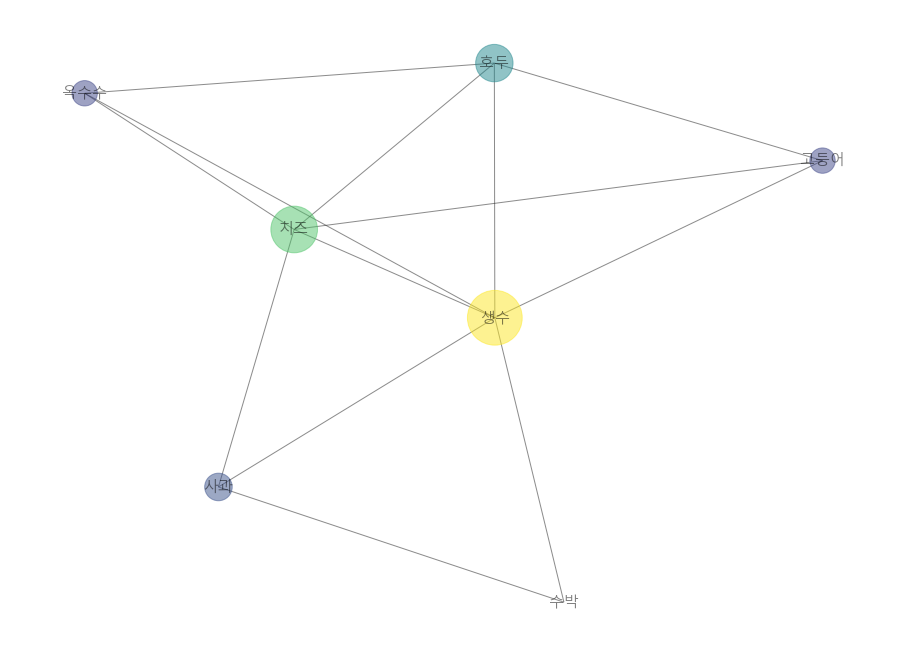

In [255]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(16,12)); plt.axis('off')
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)


fname = fm.FontProperties().get_name()
#alpha값이 1이면 투명도 없음. 동그라미(노드)안의 글자의 투명도가 없음.
#0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

#edge_color='1' 이면 선색상 안나옴. 
#camp=plt.cm.YlGN 은 전체 색상톤


nx.draw_networkx(G,  node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=15)
plt.show()

C:\Users\hmh\miniconda3\envs\hmh\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


{1: 0.18255882813442864,
 2: 0.18255882813442864,
 3: 0.30227235186908474,
 4: 0.1281116512637307,
 5: 0.1281116512637307,
 0: 0.07638668933459647}

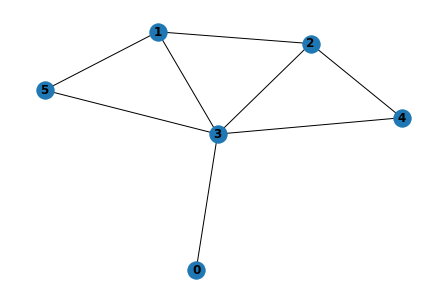

In [256]:
my_graph = nx.Graph() 
# Add edges to to the graph object
# Each tuple represents an edge between two nodes
my_graph.add_edges_from([
                        (1,2), 
                        (1,3), 
                        (3,4), 
                        (1,5), 
                        (3,5),
                        (4,2),
                        (2,3),
                        (3,0)])


#Draw the resulting graph
nx.draw(my_graph, with_labels=True, font_weight='bold')

import numpy as  np
nx.pagerank(my_graph)
